# Using Ensembles to Predict Gamma 

NOTE Before starting this assignment please remember to clear your environment, you can do that by running the following code chunk

In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
import xgboost as xgb


from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.cross_validation import cross_val_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [66]:
import warnings

warnings.filterwarnings("ignore")

# Agenda

- Read in the data


- Data Pre-processing


- Build Multiple Models


- Stack those models


- Report Metrics of Models on Test Data

# Reading & Understanding the Data

## Read the Data

* Make sure the dataset is located in your current working directory, or else you can change your working directory using the “setwd()” function.

In [2]:
gamma_data = pd.read_csv('C:\\Users\\Home\\Python\\practies_ EDA\\data\\gamma_data.csv')
gamma_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
1,18.8562,16.4600,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.4610,162.8480,1
2,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,1
3,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260,1
4,20.3836,9.0462,2.3365,0.6359,0.3894,22.2700,12.9487,-2.0403,43.0032,66.1667,1
5,23.5647,9.9926,2.2095,0.5679,0.3364,30.0056,-13.8665,-8.2600,26.5328,185.1890,1
6,87.4217,26.7866,3.4231,0.2809,0.1761,10.4779,68.3446,-24.0948,0.3647,371.7900,1
7,75.2057,31.6833,3.1334,0.1920,0.0997,-58.1243,43.0800,10.3219,1.5926,282.9150,1
8,84.6100,36.4657,3.6809,0.1393,0.0714,54.4505,86.0228,16.1472,17.5750,258.5970,1
9,37.7420,24.3346,3.0404,0.2478,0.1508,5.9980,34.4104,13.7756,24.2160,131.6010,1


# Understand the data

* Use the str(), summary(), head() and tail() functions to get the dimensions and types of attributes in the dataset
* The dataset has 3804 observations and 11 variables

In [3]:
gamma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 11 columns):
fLength     3804 non-null float64
fWidth      3804 non-null float64
fSize       3804 non-null float64
fConc       3804 non-null float64
fConc1      3804 non-null float64
fAsym       3804 non-null float64
fM3Long     3804 non-null float64
fM3Trans    3804 non-null float64
fAlpha      3804 non-null float64
fDist       3804 non-null float64
class       3804 non-null int64
dtypes: float64(10), int64(1)
memory usage: 327.0 KB


The dataset has 3804 observations with 11 variables, the descriptions of the variables are given below :

- **fLength** : continuous # major axis of ellipse [mm]


- **fWidth**  : continuous # minor axis of ellipse [mm]


- **fSize**   : continuous # 10-log of sum of content of all pixels [in #phot]


- **fConc**   : continuous # ratio of sum of two highest pixels over fSize [ratio]


- **fConc1**  : continuous # ratio of highest pixel over fSize [ratio]


- **fAsym**   : continuous # distance from highest pixel to center, projected onto major axis [mm]


- **fM3Long** : continuous # 3rd root of third moment along major axis [mm]


- **fM3Trans**: continuous # 3rd root of third moment along minor axis [mm]


- **fAlpha**  : continuous # angle of major axis with vector to origin [deg]


- **fDist**   : continuous # distance from origin to center of ellipse [mm]


- **class**   : 1, 0 # 1 - gamma (signal), 0 - hadron (background)


* Let’s look at the head and tail of the dataset

In [5]:
gamma_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
1,18.8562,16.4600,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.4610,162.8480,1
2,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,1
3,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260,1
4,20.3836,9.0462,2.3365,0.6359,0.3894,22.2700,12.9487,-2.0403,43.0032,66.1667,1


In [6]:
gamma_data.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3799,207.2530,75.8327,4.1476,0.0739,0.0371,-242.4960,-180.0290,-57.8600,74.5740,259.3160,0
3800,172.2442,20.1926,2.9009,0.2887,0.1940,124.5990,112.9452,-21.4436,28.9553,210.8496,0
3801,32.4902,10.6723,2.4742,0.4664,0.2735,-27.0097,-21.1687,8.4813,69.1730,120.6680,0
3802,43.2980,17.3545,2.8307,0.2877,0.1646,-60.1842,-33.8513,-3.6545,78.4099,224.8299,0
3803,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0


# Data Pre-processing

* Convert the class column into a factor

In [7]:
gamma_data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [8]:
gamma_data['class'] = gamma_data['class'].astype('category')
gamma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 11 columns):
fLength     3804 non-null float64
fWidth      3804 non-null float64
fSize       3804 non-null float64
fConc       3804 non-null float64
fConc1      3804 non-null float64
fAsym       3804 non-null float64
fM3Long     3804 non-null float64
fM3Trans    3804 non-null float64
fAlpha      3804 non-null float64
fDist       3804 non-null float64
class       3804 non-null category
dtypes: category(1), float64(10)
memory usage: 301.1 KB


# Split the Data

* Split the data into train/test sets (70/30)

In [6]:
x = gamma_data.drop('class', axis =1)
y = gamma_data['class']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [8]:
clf =DecisionTreeClassifier(criterion='gini', max_depth=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
clf = BaggingClassifier()
BaggingClassifier(n_estimators=10)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [10]:
clf.fit(x_train,y_train)
clf_bg = clf.predict(x_test)

In [11]:
print(confusion_matrix(y_test, clf_bg))
print(classification_report(y_test, clf_bg))

[[202  60]
 [ 49 450]]
             precision    recall  f1-score   support

          0       0.80      0.77      0.79       262
          1       0.88      0.90      0.89       499

avg / total       0.86      0.86      0.86       761



In [12]:
recall_score(y_test, clf_bg, pos_label=1)

0.9018036072144289

In [13]:
precision_score(y_test, clf_bg, pos_label=1)

0.8823529411764706

In [14]:
clf = RandomForestClassifier()
RandomForestClassifier(n_estimators=10, min_samples_split=5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
clf.fit(x_train, y_train)

clf_rf = clf.predict(x_test)
clf_rf

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [16]:
print(confusion_matrix(y_test, clf_rf))
print(classification_report(y_test, clf_rf))

[[207  55]
 [ 52 447]]
             precision    recall  f1-score   support

          0       0.80      0.79      0.79       262
          1       0.89      0.90      0.89       499

avg / total       0.86      0.86      0.86       761



In [17]:
recall_score(y_test, clf_rf, pos_label=1)

0.8957915831663327

In [18]:
precision_score(y_test, clf_rf, pos_label=1)

0.8904382470119522

In [19]:
clf.feature_importances_

array([0.12429327, 0.15210747, 0.14080477, 0.05722263, 0.0525821 ,
       0.06062479, 0.07004511, 0.04674432, 0.22939101, 0.06618453])

In [20]:
cross_val_score(clf,x,y,cv=4,scoring='recall')

array([0.87820513, 0.90048154, 0.89085072, 0.87961477])

In [21]:
#export_graphviz(clf, out_file='gamma_data.dot')

## Boosting

In [22]:
baseclf = DecisionTreeClassifier(max_depth=4)

In [23]:
clf  = AdaBoostClassifier(base_estimator=baseclf, n_estimators=50)

In [24]:
clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [25]:
clf_ada = clf.predict(x_test)

In [26]:
print(confusion_matrix(y_test, clf_ada))
print(classification_report(y_test, clf_ada))

[[179  83]
 [ 49 450]]
             precision    recall  f1-score   support

          0       0.79      0.68      0.73       262
          1       0.84      0.90      0.87       499

avg / total       0.82      0.83      0.82       761



In [27]:
recall_score(y_test, clf_ada, pos_label=1)

0.9018036072144289

In [28]:
precision_score(y_test, clf_ada, pos_label=1)

0.8442776735459663

In [29]:
clf.feature_importances_

array([0.11429253, 0.11200076, 0.11833786, 0.08041916, 0.07716155,
       0.08734253, 0.08445107, 0.07718296, 0.14391415, 0.10489743])

## GBM

In [30]:
clf = GradientBoostingClassifier(n_estimators=3000, verbose=True, max_depth=5, min_samples_leaf=6)

In [31]:
clf.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1880            2.75m
         2           1.1087            1.60m
         3           1.0427            1.33m
         4           0.9875            1.14m
         5           0.9373            1.01m
         6           0.8962           54.89s
         7           0.8597           50.88s
         8           0.8245           47.87s
         9           0.7913           45.53s
        10           0.7657           43.66s
        20           0.5917           35.61s
        30           0.5005           31.98s
        40           0.4479           29.38s
        50           0.4038           28.20s
        60           0.3715           27.20s
        70           0.3408           26.62s
        80           0.3146           26.57s
        90           0.2900           25.90s
       100           0.2647           25.35s
       200           0.1343           22.82s
       300           0.0685           21.58s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3000,
              presort='auto', random_state=None, subsample=1.0,
              verbose=True, warm_start=False)

In [32]:
clf_gb = clf.predict(x_test)
clf_gb

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [33]:
print(confusion_matrix(y_test, clf_gb))
print(classification_report(y_test,clf_gb))

[[201  61]
 [ 32 467]]
             precision    recall  f1-score   support

          0       0.86      0.77      0.81       262
          1       0.88      0.94      0.91       499

avg / total       0.88      0.88      0.88       761



In [34]:
recall_score(y_test, clf_gb, pos_label=1)

0.935871743486974

In [35]:
precision_score(y_test,clf_gb, pos_label=1)

0.884469696969697

In [36]:
clf.feature_importances_

array([0.0607808 , 0.04653791, 0.04381344, 0.03506249, 0.03474337,
       0.03533377, 0.03636296, 0.03435687, 0.06040351, 0.04227153])

In [37]:
dict(zip(x_train.columns, clf.feature_importances_))

{'fAlpha': 0.06040351482783096,
 'fAsym': 0.03533376719249049,
 'fConc': 0.0350624938070566,
 'fConc1': 0.03474336961613963,
 'fDist': 0.04227153400026549,
 'fLength': 0.06078080392444035,
 'fM3Long': 0.03636295981188125,
 'fM3Trans': 0.03435687089278607,
 'fSize': 0.04381343976790801,
 'fWidth': 0.04653791282586792}

## XGboost

In [38]:
clf = XGBClassifier()
XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [68]:
clf.fit(x_train, y_train)
clf_xgb = clf.predict(x_test)

In [40]:
print(confusion_matrix(y_test, clf_xgb))
print(classification_report(y_test,clf_xgb))

[[192  70]
 [ 24 475]]
             precision    recall  f1-score   support

          0       0.89      0.73      0.80       262
          1       0.87      0.95      0.91       499

avg / total       0.88      0.88      0.87       761



In [41]:
recall_score(y_test, clf_xgb, pos_label=1)

0.9519038076152304

In [42]:
precision_score(y_test,clf_xgb, pos_label=1)

0.8715596330275229

In [43]:
clf.feature_importances_

array([0.12846716, 0.15912409, 0.17518248, 0.0729927 , 0.04233577,
       0.0729927 , 0.0729927 , 0.04379562, 0.15328467, 0.07883212],
      dtype=float32)

## Hyperparameter Tunning of XGboost

In [44]:
classification =xgb.XGBClassifier(
    learning_rate=0.1, n_estimators=1000,
    max_depth=5, min_child_weight=1, gamma=0,
    subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic',nthread=4,
    scale_pos_weight=1, seed=27)

In [69]:
classification.fit(x_train,y_train)
pred = classification.predict(x_test)

In [46]:
print("Accuracy: %.2f" % (accuracy_score(y_test, pred)* 100.0))

Accuracy: 87.65


## GridSearchCV

In [70]:
param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
    
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gscv = gsearch.fit(x_train, y_train)
gscv_pred = gscv.predict(x_test)
print("Accuracy 1: %.2f" % (accuracy_score(y_test, gscv_pred) * 100))

Accuracy 1: 85.89


In [71]:
param_test2 = {
 'min_child_weight':[6,8,10,12]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gscv1 = gsearch2.fit(x_train, y_train)
gscv_pred1 = gscv1.predict(x_test)
print("Accuracy 2: %.2f" % (accuracy_score(y_test, gscv_pred1) * 100))

Accuracy 2: 86.32


## Tune Gamma

In [72]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gscv3 = gsearch3.fit(x_train, y_train)
gscv_pred = gscv3.predict(x_test)
print("Accuracy 3: %.2f" % (accuracy_score(y_test, gscv_pred) * 100))

Accuracy 3: 86.21


In [73]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

model12 = xgb2.fit(x_train, y_train)
pred12 = model12.predict(x_test)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test, pred12) * 100))

Accuracy for model 7: 86.95


In [51]:
#Let's train a fast RandomForest on the dataset
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train, y_train)
pred13 = rfc_model.predict(x_test)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, pred13) * 100))

Accuracy for Random Forest Model: 85.68


# KNN


In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
knn_pred = knn.predict(x_test)

In [54]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[136 126]
 [ 43 456]]
             precision    recall  f1-score   support

          0       0.76      0.52      0.62       262
          1       0.78      0.91      0.84       499

avg / total       0.78      0.78      0.77       761



In [55]:
print("Accuracy for KNN: %.2f" % (accuracy_score(y_test, knn_pred) * 100))

Accuracy for KNN: 77.79


In [56]:
recall_score(y_test, knn_pred, pos_label=1)

0.9138276553106213

In [57]:
precision_score(y_test, knn_pred, pos_label=1)

0.7835051546391752

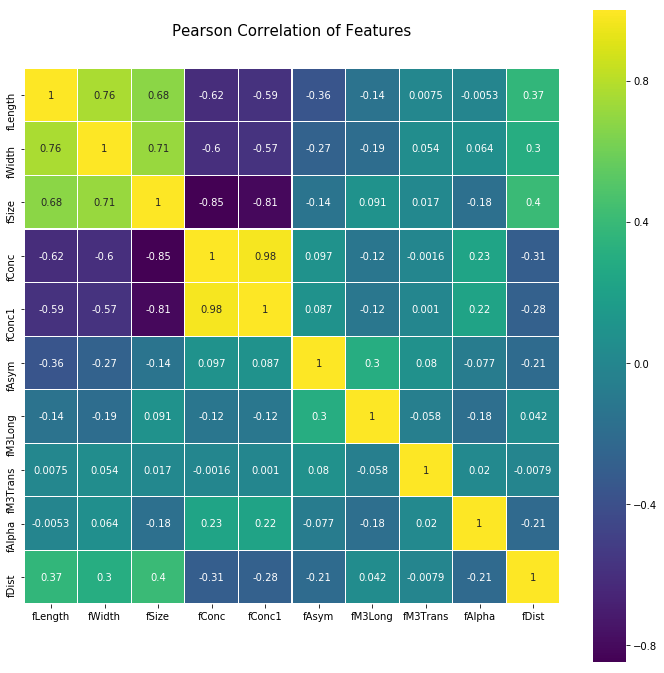

In [58]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Kfold

In [59]:
kf = KFold(n_splits = 4,shuffle=True)

In [74]:
prec = []
rec = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    prec_Score = precision_score(y_test,preds)
    rec_Score = recall_score(y_test,preds)
    prec.append(prec_Score)
    rec.append(rec_Score)
    

TypeError: split() missing 1 required positional argument: 'y'

In [61]:
print(np.mean(prec), np.std(prec))
print(np.mean(rec), np.std(rec))

0.8666789645436425 0.005252521729999966
0.9494268151187637 0.006672112483019941


## Stratified Kfold

In [62]:
kf = StratifiedKFold(n_splits = 4,shuffle=True)

In [ ]:
prec = []
rec = []
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(x_train,y_train)
    preds = clf.predict(x_test)
    prec_Score = precision_score(y_test,preds)
    rec_Score = recall_score(y_test,preds)
    prec.append(prec_Score)
    rec.append(rec_Score)
    

In [64]:
print(np.mean(prec), np.std(prec))
print(np.mean(rec), np.std(rec))

0.8645721801448956 0.009794064695509867
0.943440162365724 0.009529634272164076


## CrossVal Score

In [65]:
cross_val_score(clf,x,y,cv=4,n_jobs=-1,scoring='f1')

array([0.90672783, 0.90297937, 0.9003861 , 0.90644172])

## Visualize the tree

In [91]:
#with open("decisiontree.dot", 'w') as f:
  #  f = export_graphviz(clf, out_file=f,feature_names=x.columns.values,filled=True, rounded=True,special_characters=True,class_names=['0','1'], proportion=True)